In [1]:
import os
import urllib
import urllib.request
from nnfs.datasets import spiral_data

In [2]:
from nnfs.datasets import sine_data
X, y = sine_data()

# transpose the matrices
X = X.T
y = y.T

In [3]:
print("X shape = ", X.shape)
print("y shape = ", y.shape)

X shape =  (1, 1000)
y shape =  (1, 1000)


In [4]:
from NN_ClassModel import*

In [5]:
n_neurons_h = 64
n_neurons_o = 1

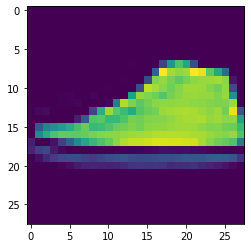

In [6]:
# load the image data:
import cv2

image_data = cv2.imread('fashion_mnist_images/train/7/0002.png', cv2.IMREAD_UNCHANGED)

import matplotlib.pyplot as plt
plt.imshow(image_data)
plt.show()

In [7]:
# Scan all the directories and create a list of labels
labels = os.listdir('fashion_mnist_images/train')

# Loads a MNIST dataset
def load_mnist_dataset(dataset , path):
    
    # Scan all the directories and create a list of labels
    labels = os.listdir(os.path.join(path, dataset))

    # Create lists for samples and labels
    X = []
    y = []

    # For each label folder
    for label in labels:
        
        # And for each image in given folder
        for file in os.listdir(os.path.join(path, dataset, label)):
        
            # Read the image
            image = cv2.imread(os.path.join(path, dataset, label, file), cv2.IMREAD_UNCHANGED)

            # And append it and a label to the lists
            X.append(image)
            y.append(label)
    # Convert the data to proper numpy arrays and return
    return np.array(X), np.array(y).astype('uint8')

In [8]:
# MNIST dataset (train + test)
def create_data_mnist(path):
    
    # Load both sets separately
    X, y = load_mnist_dataset('train' , path)
    X_test, y_test = load_mnist_dataset('test' , path)
    
    # And return all the data
    return X, y, X_test, y_test

In [9]:
X, y, X_test, y_test = create_data_mnist('fashion_mnist_images')

print('the shape of X :', X.shape)
print('the shape of y :', y.shape)
print('the shape of X_test :', X_test.shape)
print('the shape of y_test :', y_test.shape)

the shape of X : (60000, 28, 28)
the shape of y : (60000,)
the shape of X_test : (10000, 28, 28)
the shape of y_test : (10000,)


In [10]:
# Shuffle the training dataset
keys = np.array(range(X.shape[0]))
np.random.shuffle(keys)
X = X[keys]
y = y[keys]
# 
# Scale and reshape samples
X = X/255
X_test = X_test/255 

In [11]:
X = X.reshape(X.shape[0], -1)
y = y.reshape(y.shape[0], 1)
X = X.T
y = y.T

In [12]:
X_test = X_test.reshape(X_test.shape[0], -1)
y_test = y_test.reshape(y_test.shape[0], 1)
X_test = X_test.T
y_test = y_test.T

In [13]:
print('the shape of X :', X.shape)
print('the shape of y :', y.shape)
print('the shape of X_test :', X_test.shape)
print('the shape of y_test :', y_test.shape)

the shape of X : (784, 60000)
the shape of y : (1, 60000)
the shape of X_test : (784, 10000)
the shape of y_test : (1, 10000)


In [14]:
# Instantiate the model
model = Model()

# Add layers
model.add(Layer_Dense(64, X.shape[0], weight_regularizer_L2 = 5e-4 ,bias_regularizer_L2 = 5e-4))
model.add(Activation_ReLU())
# model.add(Layer_Dense( 64 , 64 ))
# model.add(Activation_ReLU())
model.add(Layer_Dense(10 , 64 ))
model.add(Activation_Softmax())

# Set loss, optimizer and accuracy objects
model.set(
loss = Loss_CategoricalCrossentropy(),
optimizer = Optimizer_Adam( learning_rate = 0.001 , decay = 5e-5),
accuracy = Accuracy_Categorical()
)

# Finalize the model
model.finalize()

# Train the model
model.fit(X, y, epochs = 5, batch_size = 128, print_every = 100, validation_data=(X_test, y_test))

[===] step: 0- loss: 2.303 (data_loss: 2.3005, reg loss: 0.002) - accuracy: 0.141 - lr: 0.001
[===] step: 100- loss: 0.8639 (data_loss: 0.8291, reg loss: 0.035) - accuracy: 0.672 - lr: 0.000995
[===] step: 200- loss: 0.6419 (data_loss: 0.5968, reg loss: 0.045) - accuracy: 0.82 - lr: 0.00099
[===] step: 300- loss: 0.6354 (data_loss: 0.5854, reg loss: 0.05) - accuracy: 0.773 - lr: 0.000985
[===] step: 400- loss: 0.6406 (data_loss: 0.5882, reg loss: 0.052) - accuracy: 0.828 - lr: 0.00098
	✅: [██████████] 466/468 steps done
	✅: [██████████] 467/468 steps done
[===] step: 468- loss: 0.5755 (data_loss: 0.5221, reg loss: 0.053) - accuracy: 0.833 - lr: 0.000977
	✅: [██████████] 468/468 steps done
Epoch 1/5
[=====Training] - loss: 0.7819 (data_loss: 0.7284, reg loss: 0.053) - accuracy: 0.75 - lr: 0.000977
***** Validation:  - validation_loss: 0.5281 - validation_accuracy: 0.817


[===] step: 0- loss: 0.5707 (data_loss: 0.5173, reg loss: 0.053) - accuracy: 0.82 - lr: 0.000977
[===] step: 100- lo